# Dataset download

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aryankashyapnaveen","key":"14b23c841fa6aa0de809122676f22c02"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
stanford-dogs-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip '/content/stanford-dogs-dataset.zip'
#!rm -rf /content/stanford-dogs-dataset.zip

Archive:  /content/stanford-dogs-dataset.zip
replace annotations/Annotation/n02085620-Chihuahua/n02085620_10074? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import os

dataset_path = '/content/images/Images'

# List subdirectories (breeds)
breeds = os.listdir(dataset_path)
print("Number of breeds:", len(breeds))
print("Example breeds:", breeds[:5])

# List files in one breed (adjust as needed)
breed_path = os.path.join(dataset_path, breeds[0])
images_in_breed = os.listdir(breed_path)
print("Number of images in one breed:", len(images_in_breed))
print("Example images:", images_in_breed[:5])


Number of breeds: 120
Example breeds: ['n02092002-Scottish_deerhound', 'n02088364-beagle', 'n02093647-Bedlington_terrier', 'n02099712-Labrador_retriever', 'n02089973-English_foxhound']
Number of images in one breed: 232
Example images: ['n02092002_2269.jpg', 'n02092002_6114.jpg', 'n02092002_6518.jpg', 'n02092002_5668.jpg', 'n02092002_2448.jpg']


size img(584, 800, 3)
size img(325, 500, 3)
size img(375, 500, 3)
size img(500, 375, 3)
size img(375, 500, 3)
size img(375, 500, 3)
size img(375, 500, 3)
size img(375, 500, 3)
size img(500, 375, 3)


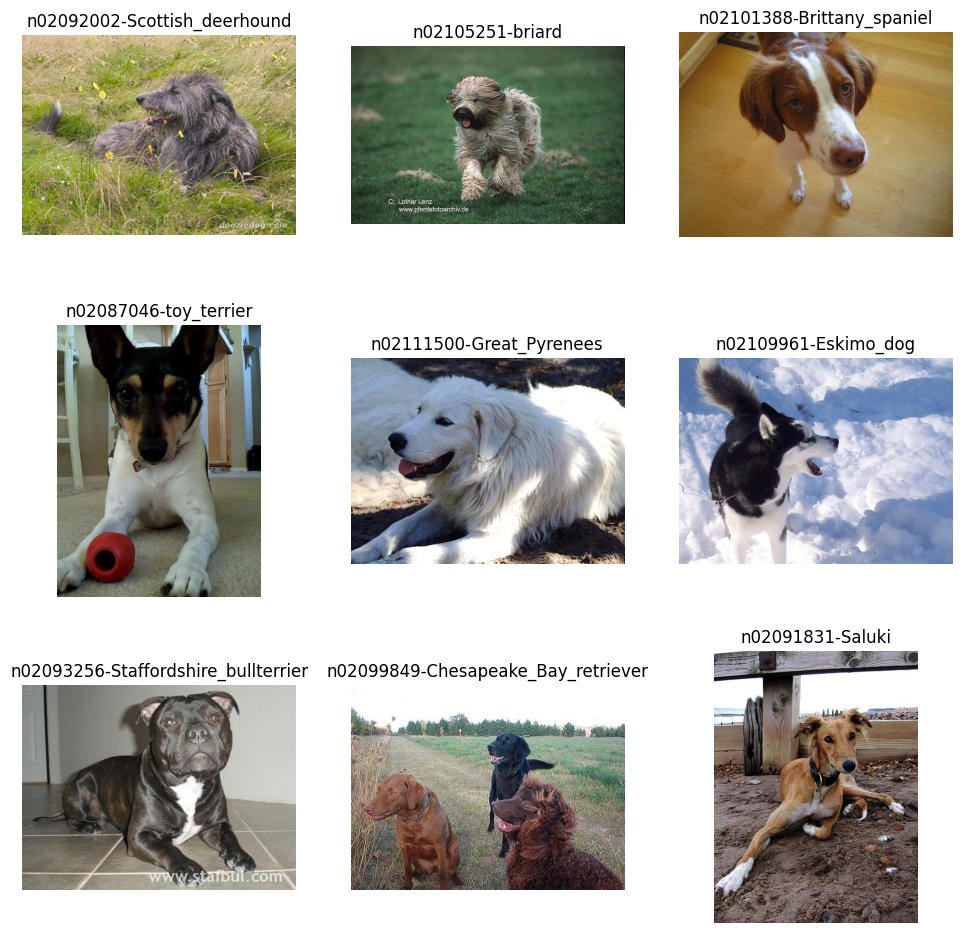

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

# Visualize random images from different breeds
num_rows = 3
num_cols = 3

plt.figure(figsize=(12, 12))

for i in range(num_rows * num_cols):
    breed = random.choice(breeds)
    breed_path = os.path.join(dataset_path, breed)
    image_file = random.choice(os.listdir(breed_path))
    image_path = os.path.join(breed_path, image_file)

    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(imread(image_path))
    print(f"size img{imread(image_path).shape}")
    plt.title(breed)
    plt.axis('off')

plt.show()

In [6]:
import os
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Dataloader config

In [7]:
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from PIL import Image
import torch
import torch.nn.functional as F


transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Adjust the size as needed
    transforms.ToTensor(),
])




dataset = ImageFolder(root=dataset_path, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

batch_size = 128 #set to 32 later
train_loader = DataLoader(train_dataset, batch_size=batch_size,
                          shuffle=True, num_workers=4)

test_loader = DataLoader(test_dataset, batch_size=batch_size,
                         shuffle=False, num_workers=4)#look into collate fn

# Display batch
for images, targets in train_loader:
  print("Training Batch shape:", images.shape)
  break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training Batch shape: torch.Size([128, 3, 256, 256])


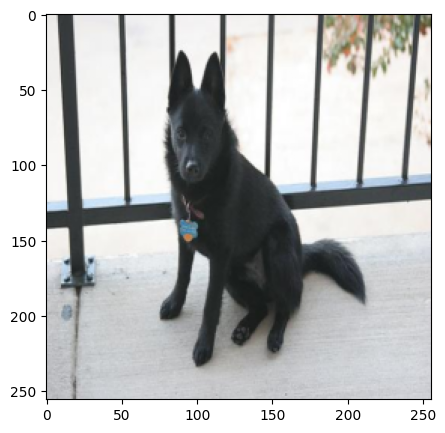

In [8]:
import numpy as np

# obtain one batch of training images
for images, labels in train_loader:
    break  # Get the first batch only

images = images.numpy()

# get one image from the batch and transpose the axes
img = np.transpose(images[0], (1, 2, 0))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(img)
plt.show()


In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [10]:
if torch.cuda.is_available():
    # Get the GPU device
    device = torch.device("cuda")
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU.")

GPU: Tesla T4


## Attention Module

In [11]:
class AttentionModule(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(AttentionModule, self).__init__()

        # Convolutional layers to compute attention weights
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, 1, kernel_size=3, padding=1)

        # Softmax to obtain attention weights
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        # Compute attention weights
        att = F.relu(self.conv1(x))
        att = self.conv2(att)
        att = self.softmax(att.view(att.size(0), -1)).view_as(att)

        # Multiply input by attention weights
        x = x * att

        return x

## Conv architecture

In [ ]:


# define the NN architecture
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        # Encoder layers
         # conv layer (depth from 3 --> 64), 3x3 kernels
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
         # conv layer (depth from 64 --> 128), 3x3 kernels
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
         # conv layer (depth from 128 --> 256), 3x3 kernels
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Decoder layers
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.t_conv3 = nn.ConvTranspose2d(64, 3, kernel_size=2, stride=2)

    def forward(self, x):
        # Encoder
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)

        # Decoder
        x = F.relu(self.t_conv1(x))
        x = F.relu(self.t_conv2(x))
        x = F.sigmoid(self.t_conv3(x))

        return x

# initialize the NN
model = ConvAutoencoder()
print(model)
# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

ConvAutoencoder(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(128, 64, kernel_size=(2, 2), stride=(2, 2))
  (t_conv3): ConvTranspose2d(64, 3, kernel_size=(2, 2), stride=(2, 2))
)


In [13]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Training loop

In [14]:
# number of epochs to train the model
n_epochs = 20

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0

    ###################
    # train the model #
    ###################
    for data in train_loader:

        # _ stands in for labels, here
        # no need to flatten images
        images, _ = data
        images = images.to(device)
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)
        # calculate the loss
        loss = criterion(outputs, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)

    # print avg training statistics
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch,
        train_loss
        ))

Epoch: 1 	Training Loss: 1.994838
Epoch: 2 	Training Loss: 0.702805
Epoch: 3 	Training Loss: 0.517634
Epoch: 4 	Training Loss: 0.451087
Epoch: 5 	Training Loss: 0.415353
Epoch: 6 	Training Loss: 0.389064
Epoch: 7 	Training Loss: 0.362609
Epoch: 8 	Training Loss: 0.352665
Epoch: 9 	Training Loss: 0.338773
Epoch: 10 	Training Loss: 0.329164
Epoch: 11 	Training Loss: 0.319450
Epoch: 12 	Training Loss: 0.314092
Epoch: 13 	Training Loss: 0.306018
Epoch: 14 	Training Loss: 0.304179
Epoch: 15 	Training Loss: 0.292335
Epoch: 16 	Training Loss: 0.284590
Epoch: 17 	Training Loss: 0.283395
Epoch: 18 	Training Loss: 0.281486
Epoch: 19 	Training Loss: 0.273669
Epoch: 20 	Training Loss: 0.269783


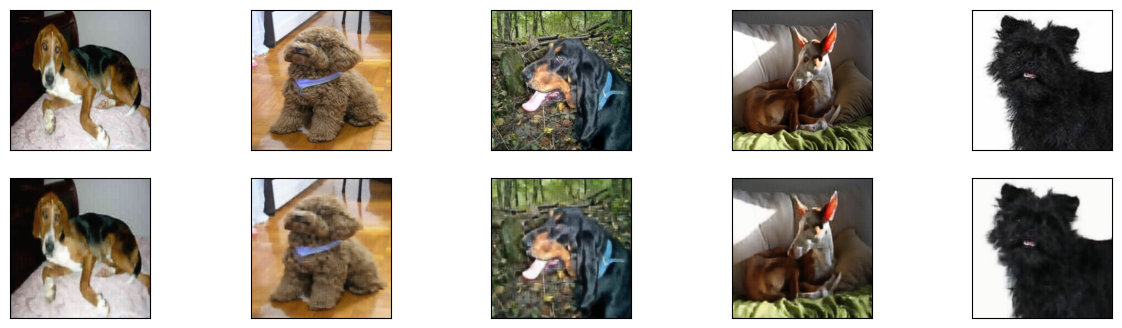

In [19]:
num_images_to_display = 5

# Obtain one batch of test images
for images, labels in test_loader:
    break

# Move input images to the same device as the model
images = images.to(device)

# Get sample outputs from the model
output = model(images)

# Prep images for display
images = images.cpu().numpy()  # Move images back to CPU for display

# Output is resized into a batch of images
output = output.view(batch_size, 3, 256, 256)
# Use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()  # Move output back to CPU for display

# Plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=num_images_to_display, sharex=True, sharey=True, figsize=(15, 4))

# Input images on the top row, reconstructions on the bottom
for i in range(num_images_to_display):
    img = np.transpose(np.squeeze(images[i]), (1, 2, 0))  # Transpose for displaying RGB images
    reconstructed_img = np.transpose(np.squeeze(output[i]), (1, 2, 0))

    ax_input = axes[0, i]
    ax_input.imshow(img)
    ax_input.get_xaxis().set_visible(False)
    ax_input.get_yaxis().set_visible(False)

    ax_reconstructed = axes[1, i]
    ax_reconstructed.imshow(reconstructed_img)
    ax_reconstructed.get_xaxis().set_visible(False)
    ax_reconstructed.get_yaxis().set_visible(False)

plt.show()


In [21]:
from skimage.metrics import structural_similarity as ssim

SSIM values: [0.8514986089475155, 0.7911492859853209, 0.7196988573741055, 0.8474727941447348, 0.895150377956748, 0.7548829100647344, 0.7640474521704326, 0.8225406788199245, 0.7305419081749785, 0.7124911133887479, 0.7577603248037882, 0.8894650360712707, 0.7029604903599215, 0.8795653538248539, 0.8839611178926267, 0.7840316894954588, 0.7783133209787509, 0.7303069693373209, 0.5898624954058388, 0.73439242536591, 0.8748428241729904, 0.6991701018299088, 0.7970259714876413, 0.7457075881325826, 0.7354875994332135, 0.8152546031658501, 0.6390214663566081, 0.7602024114632756, 0.630541672187306, 0.737227728728734, 0.8955276263860464, 0.6351659639040902, 0.6188572050123308, 0.6703372357707321, 0.9036366298582554, 0.8032219330994115, 0.8476832302644253, 0.7774148759212345, 0.8387605184970778, 0.7850590305561311, 0.7843032628904677, 0.6737642459213287, 0.7318162056904647, 0.6783200805015105, 0.7710337794239581, 0.7464707603758015, 0.6499386008628705, 0.8116867857635022, 0.8257242215721086, 0.844856127

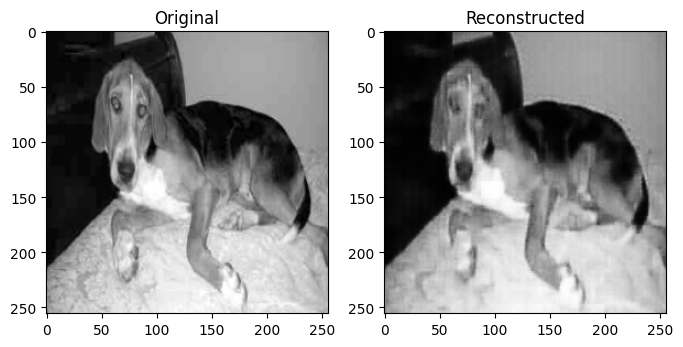

In [25]:
for images, labels in test_loader:
    break

# Move images to the same device as the model (GPU or CPU)
images = images.to(device)

# Perform inference
with torch.no_grad():
    outputs = model(images)

# Convert tensors to NumPy arrays
original_images = images.cpu().numpy()
reconstructed_images = outputs.cpu().numpy()

# Calculate SSIM for each pair of images
ssim_values = [ssim(original_images[i, 0], reconstructed_images[i, 0], data_range=original_images.max()) for i in range(len(images))]

# Print or visualize SSIM values
print("SSIM values:", ssim_values)
avg_ssim = sum(ssim_values) / len(ssim_values)

# Print or visualize average SSIM
print("Average SSIM:", avg_ssim)

# Visualize one example (original vs. reconstructed)
index_to_visualize = 0
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(original_images[index_to_visualize, 0], cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(reconstructed_images[index_to_visualize, 0], cmap='gray')
axes[1].set_title("Reconstructed")
plt.show()

In [16]:
# Save the trained model
torch.save(model.state_dict(), 'autoencoder_model.pth')


10
